**Logistic Regression Implementation:-**
In this notebook, we implement a Logistic Regression model to classify data from the Breast Cancer dataset available in scikit-learn. Logistic Regression is a supervised classification algorithm used to predict a categorical target variable based on one or more input features. Unlike linear regression, it predicts the probability of a sample belonging to a specific class using the logistic (sigmoid) function, which outputs values between 0 and 1.

This method is simple, interpretable, and efficient, making it suitable for both binary and multiclass classification tasks. It assumes a linear relationship between the features and the log-odds of the target, so it works best on datasets where this assumption approximately holds. In this notebook, we follow a full pipeline similar to our regression implementations: we perform EDA, train-test split, feature scaling, baseline modeling, hyperparameter tuning, evaluation using accuracy, precision, recall, F1-score, confusion matrix, ROC curve, cross-validation, and finally save the trained model and scaler for future use. This approach ensures a complete, reproducible classification workflow.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import joblib, warnings

warnings.filterwarnings("ignore")
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)



In [2]:
from sklearn.datasets import load_breast_cancer
# Load dataset as pandas DataFrame
data = load_breast_cancer(as_frame=True)
df = data.frame
# Separate features and target
X = df.drop(columns=['target'])
y = df['target']
# Display first 10 rows
print("First 10 rows of the Breast Cancer dataset:")
display(df.head(10))

First 10 rows of the Breast Cancer dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [6]:
print("Dataset shape:", df.shape)
print("Target classes:", y.unique())

Dataset shape: (569, 31)
Target classes: [0 1]


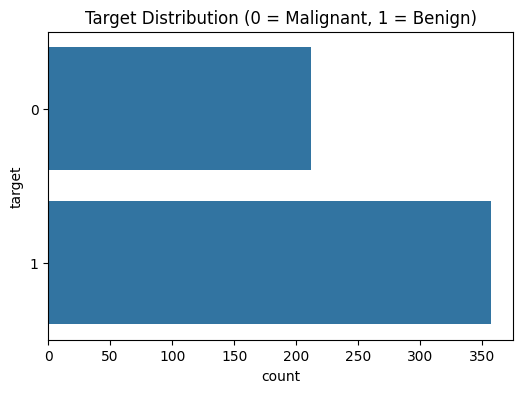

In [8]:
# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(y=y)
plt.title("Target Distribution (0 = Malignant, 1 = Benign)")
plt.show()

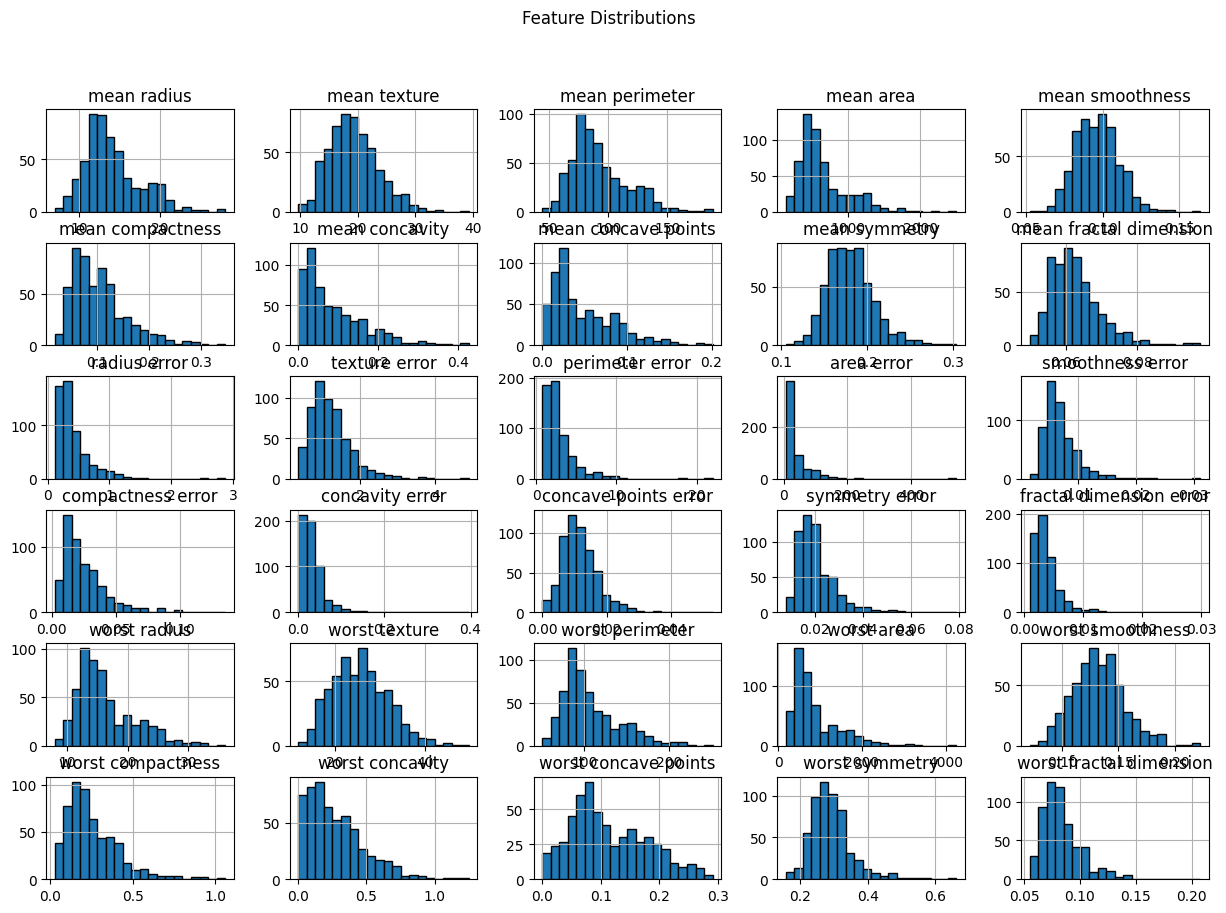

In [9]:
# Feature histograms
X.hist(figsize=(15,10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

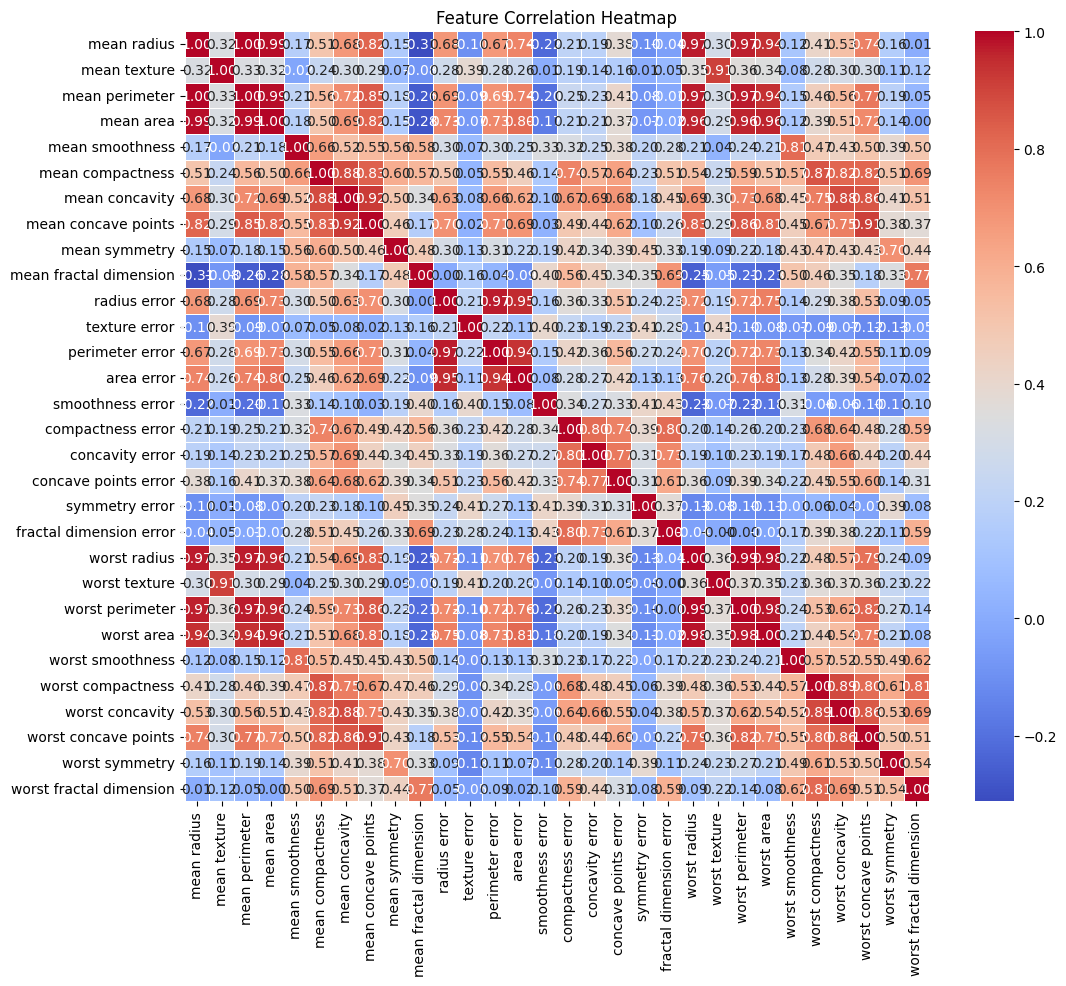

In [10]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
# Train/ Test and split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (455, 30), Test shape: (114, 30)


In [12]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Baseline Logistic Regression
# Train baseline model
baseline_lr = LogisticRegression(random_state=RANDOM_STATE, max_iter=10000)
baseline_lr.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = baseline_lr.predict(X_test_scaled)

# Evaluate baseline model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Baseline Logistic Regression Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


Baseline Logistic Regression Performance:
Accuracy:  0.9825
Precision: 0.9861
Recall:    0.9861
F1-score:  0.9861


In [16]:
# Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],
    'l1_ratio': [0, 0.5, 1]
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter=10000, random_state=RANDOM_STATE),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)

# Best model
best_lr = grid_search.best_estimator_


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


In [17]:
# Evaluate Tuned Model
# Predict on test set
y_pred_best = best_lr.predict(X_test_scaled)
# Metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
print("Tuned Logistic Regression Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Tuned Logistic Regression Performance:
Accuracy:  0.9649
Precision: 0.9595
Recall:    0.9861
F1-score:  0.9726


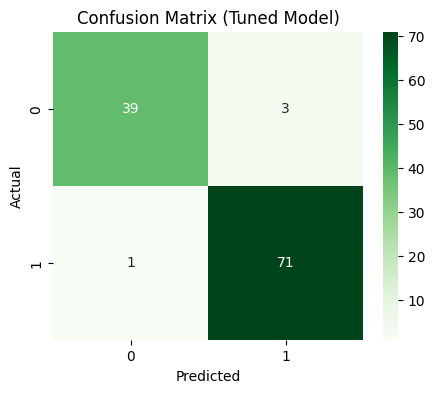

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Tuned Model)")
plt.show()


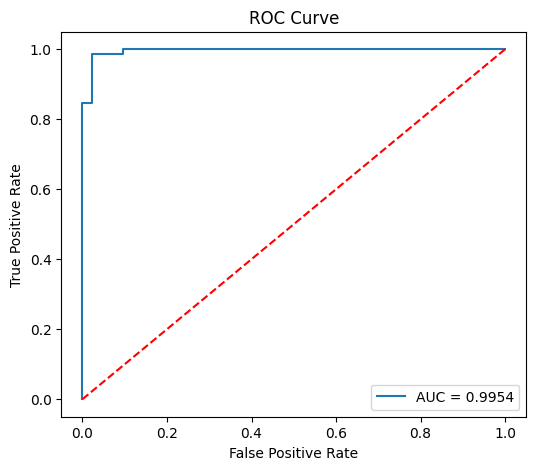

In [19]:
# ROC Curve and AUC (Binary Classification)
y_prob = best_lr.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [22]:
# Cross Validation
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=10000, random_state=RANDOM_STATE))])
cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation accuracy scores:", np.round(cv_scores,4))
print("Mean CV accuracy:", np.round(cv_scores.mean(),4))

Cross-validation accuracy scores: [0.9825 0.9825 0.9737 0.9737 0.9912]
Mean CV accuracy: 0.9807


In [23]:
joblib.dump(best_lr, '/content/logistic_regression_best_model.joblib')
joblib.dump(scaler, '/content/scaler.joblib')
print("Logistic Regression model and scaler saved successfully!")


Logistic Regression model and scaler saved successfully!


**Conclusion:-**
In this notebook, we successfully implemented a Logistic Regression model on the Breast Cancer dataset to classify tumors as malignant or benign. The model achieved high accuracy, precision, recall, and F1-score, demonstrating its ability to reliably distinguish between the two classes. Cross-validation confirmed the model’s stability and generalization across different subsets of the data.

We implemented Logistic Regression because it is simple, interpretable, and efficient, making it an excellent choice for binary classification tasks where the relationship between features and the target is approximately linear. The full pipeline — including EDA, feature scaling, baseline modeling, hyperparameter tuning, evaluation, and model saving — ensures reproducibility and prepares the model for future deployment or real-world prediction tasks.

However, Logistic Regression may struggle with highly nonlinear relationships or datasets with significant multicollinearity. In such cases, more complex models like Random Forest, Support Vector Machines, or Gradient Boosting may be more appropriate.